In [4]:
#This project is simply to show how to use SQLite to compile and combine tables, and then how to
#move those tables into arrays and dataframes so that we can use the Python tools on the data.  
#I chose to examine the possible relationship between the weather in New York City and the 
#performance of the S&P 500.  
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [5]:
#First we create the SQL database (this is only stored in this worksheet; it won't exist elsewhere)
conn = sqlite3.connect('weatherwallstreet.db')

In [6]:
#Pull in the first stet of data.  This is daily weather data collected by Laguardia Airport from 
#1990 to 2020.  This was provided by ww.ncdc.noaa.gov, which I highlyy recommend in case you ever
#need weather data.   
weather_data = pd.read_csv(r'C:\Users\danbr\OneDrive\Documents\Data Science\Weather Data NYC.csv')

In [7]:
#Next we pull in the stock data.  This is the daily performance of the S&P 500 over the same period
#as the weather data (1990 -2020).  This was pulled from Yahoo finance, and I included a column that
#describes the daily rate of change in the index price.
stock_data= pd.read_csv(r"C:\Users\danbr\OneDrive\Documents\Data Science\SP 30 yr daily.csv")

In [8]:
#We have our CSV's, but they're in pandas.  We need them in the SQL database we created.  Here is 
#how we move them in:
weather_data.to_sql('weather', conn, if_exists='replace', index=False)

In [9]:
stock_data.to_sql('stock', conn, if_exists='replace', index=False)

In [10]:
#For SQLite in Python we need to create a cursor object:
cur = conn.cursor()

In [11]:
#Now I'll define a variable with the instructions I want to enter into SQL.  Note that we use the
#three quote marks to indicate this is a multi-line string.  I'm specifying which columns I want to
#pull from each table.  I'm using an Inner Join for this.  The most important detail here is that 
#we join on the matching dates only.  The stock market is closed weekends and holidays, but the 
#weather is every day.  We want to make sure we're only looking at trading days.
sq_go = '''SELECT stock.rate, stock.Close, stock.High, stock.Low, weather.HighTemp, weather.LowTemp, weather.Precip, weather.Snowfall, weather.Wind, weather.SnowDepth
FROM stock
INNER JOIN weather
ON stock.DATE = weather.DATE;'''

In [12]:
#Instrunting the cursor object to execute the text in our variable
cur.execute(sq_go)

In [13]:
#Now to pull out the results and assign them a variable.
result = cur.fetchall()
for row in result:
    print(row)

(0.29, 3230.78, 3231.72, 3212.03, 46, 38, 0.01, 0.0, 9.4, 0.0)
(-0.58, 3221.29, 3240.92, 3216.57, 43, 38, 0.49, 0.0, 17.9, 0.0)
(0.0, 3240.02, 3247.93, 3234.37, 54, 42, 0.0, 0.0, 8.95, 0.0)
(0.51, 3239.91, 3240.08, 3227.2, 46, 36, 0.0, 0.0, 8.5, 0.0)
(-0.02, 3223.38, 3226.43, 3220.51, 48, 36, 0.0, 0.0, 8.5, 0.0)
(0.09, 3224.01, 3227.78, 3222.3, 57, 38, 0.0, 0.0, 6.71, 0.0)
(0.49, 3221.22, 3225.65, 3216.03, 34, 24, 0.0, 0.0, 11.86, 0.0)
(0.45, 3205.37, 3205.48, 3192.32, 27, 18, 0.0, 0.0, 19.69, 0.0)
(-0.04, 3191.14, 3198.48, 3191.14, 37, 23, 0.04, 0.5, 17.45, 0.0)
(0.03, 3192.52, 3198.22, 3191.03, 37, 33, 0.9, 0.0, 14.99, 0.0)
(0.71, 3191.45, 3197.71, 3183.63, 38, 34, 0.08, 0.0, 7.83, 0.0)
(0.01, 3168.8, 3182.68, 3156.51, 47, 32, 1.01, 0.0, 11.63, 0.0)
(0.86, 3168.57, 3176.28, 3138.47, 36, 27, 0.0, 0.0, 9.17, 0.0)
(0.29, 3141.63, 3143.98, 3133.21, 41, 32, 0.29, 0.9, 12.3, 1.2)
(-0.11, 3132.52, 3142.12, 3126.09, 58, 40, 0.17, 0.0, 12.3, 0.0)
(-0.32, 3135.96, 3148.87, 3135.46, 56, 41, 1.8

In [14]:
#checking that variable object to make sure it's good
print(result)

[(0.29, 3230.78, 3231.72, 3212.03, 46, 38, 0.01, 0.0, 9.4, 0.0), (-0.58, 3221.29, 3240.92, 3216.57, 43, 38, 0.49, 0.0, 17.9, 0.0), (0.0, 3240.02, 3247.93, 3234.37, 54, 42, 0.0, 0.0, 8.95, 0.0), (0.51, 3239.91, 3240.08, 3227.2, 46, 36, 0.0, 0.0, 8.5, 0.0), (-0.02, 3223.38, 3226.43, 3220.51, 48, 36, 0.0, 0.0, 8.5, 0.0), (0.09, 3224.01, 3227.78, 3222.3, 57, 38, 0.0, 0.0, 6.71, 0.0), (0.49, 3221.22, 3225.65, 3216.03, 34, 24, 0.0, 0.0, 11.86, 0.0), (0.45, 3205.37, 3205.48, 3192.32, 27, 18, 0.0, 0.0, 19.69, 0.0), (-0.04, 3191.14, 3198.48, 3191.14, 37, 23, 0.04, 0.5, 17.45, 0.0), (0.03, 3192.52, 3198.22, 3191.03, 37, 33, 0.9, 0.0, 14.99, 0.0), (0.71, 3191.45, 3197.71, 3183.63, 38, 34, 0.08, 0.0, 7.83, 0.0), (0.01, 3168.8, 3182.68, 3156.51, 47, 32, 1.01, 0.0, 11.63, 0.0), (0.86, 3168.57, 3176.28, 3138.47, 36, 27, 0.0, 0.0, 9.17, 0.0), (0.29, 3141.63, 3143.98, 3133.21, 41, 32, 0.29, 0.9, 12.3, 1.2), (-0.11, 3132.52, 3142.12, 3126.09, 58, 40, 0.17, 0.0, 12.3, 0.0), (-0.32, 3135.96, 3148.87, 3135

In [16]:
#So, we have our numbers.  Is it a dataframe?  Is it an array?  Let's check:
type(result)

list

In [17]:
#All right.  It's a list.  Let's make an array 'num' out of our list 'result'
num=np.array(result)

In [18]:
#Now let's make a dataframe out of that array.  We'll use 'num' as the data, and add column names.
#Make sure the column names are in the same order we pulled them in SQL.
data=pd.DataFrame(num, columns=['Rate', 'Close', 'StockHigh', 'StockLow', 'TempHigh', 'TempLow', 'Rain', 'Snowfall', 'Wind', 'SnowDepth'])

In [19]:
#How does that look?
print(data)

      Rate    Close  StockHigh  StockLow  TempHigh  TempLow  Rain  Snowfall  \
0     0.29  3230.78    3231.72   3212.03      46.0     38.0  0.01       0.0   
1    -0.58  3221.29    3240.92   3216.57      43.0     38.0  0.49       0.0   
2     0.00  3240.02    3247.93   3234.37      54.0     42.0  0.00       0.0   
3     0.51  3239.91    3240.08   3227.20      46.0     36.0  0.00       0.0   
4    -0.02  3223.38    3226.43   3220.51      48.0     36.0  0.00       0.0   
...    ...      ...        ...       ...       ...      ...   ...       ...   
7554  0.45   353.79     354.24    350.54      41.0     34.0  0.85       2.1   
7555 -0.98   352.20     355.67    351.35      50.0     37.0  0.00       0.0   
7556 -0.86   355.67     358.76    352.89      51.0     39.0  0.01       0.0   
7557 -0.26   358.76     360.59    357.89      50.0     36.0  0.00       0.0   
7558  0.00   359.69     359.69    351.98      43.0     31.0  0.00       0.0   

       Wind  SnowDepth  
0      9.40        0.0  
1

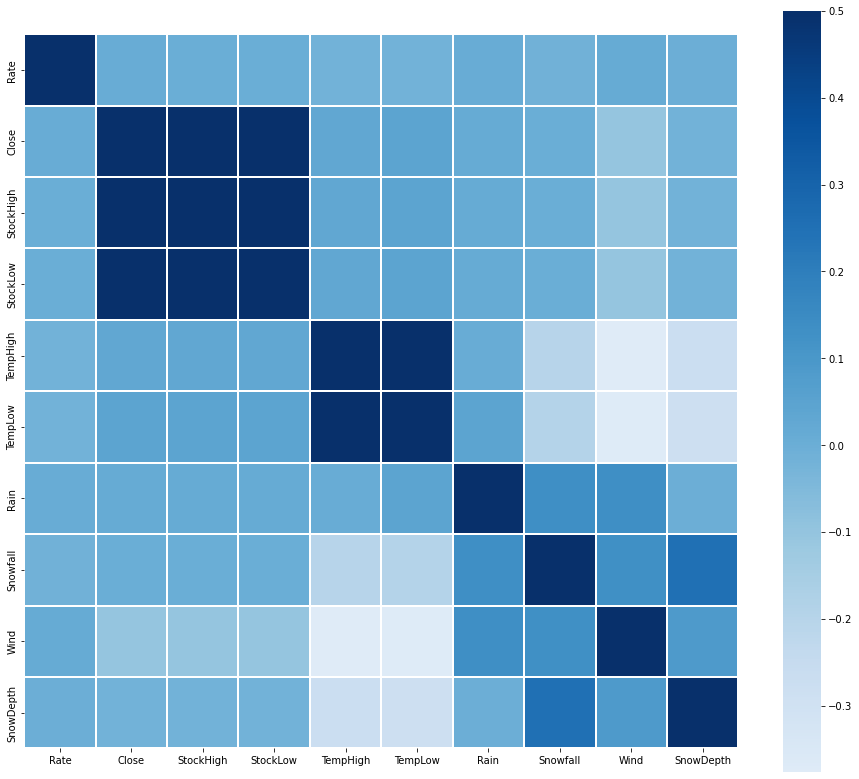

In [20]:
#Looking good!  Let's examine this data!  What is the correlation between temperature, rain,
#snow, and the S&P?  Where to begin?  I like to run a heat map.  We can visualize correlations
#and get an idea of where to start.
corr = data.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [22]:
#Hmph.  The only meaningful correlations seem to be the stock prices (amongst themselves)
#and the daily highs and lows.  Well.  I'm disappointed, but I guess  it makes sense.  The 
#stock market is indoors.  Why would the weather matter?  
#But let's look closer.  What is the correlation coefficient for the daily rate and daily rain?
print(data['Rate'].corr(data['Rain']))

0.008690446793258205


In [ ]:
#OOF!!  That's not correlated at all.  All right, this one's a rain out.  No relationship between
#stock prices and weather. Still, that was a good use of SQL and Python.  And now we know!